In [1]:
import networkx as nx

n = 20
G = nx.complete_graph(n)

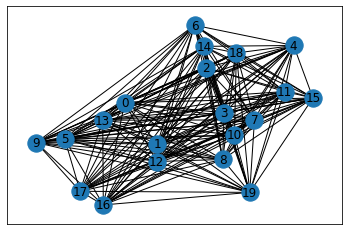

In [2]:
import random

my_pos = { i:(random.random(),random.random()) for i in G.nodes}
nx.draw_networkx(G,my_pos,with_labels=True)

In [3]:
import math
def eucl_dist(x1,y1,x2,y2):
    return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)

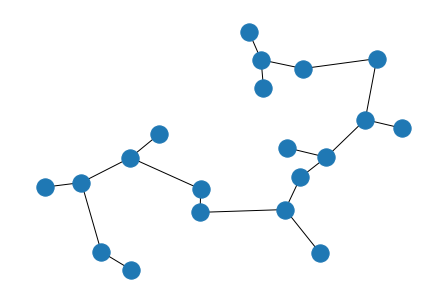

In [4]:
T = nx.minimum_spanning_tree(G, weight='length')
nx.draw(T, pos=my_pos)

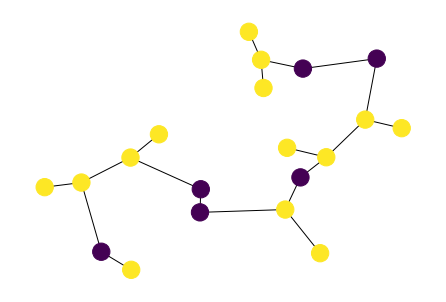

In [5]:
odd_degree_nodes = [i for i in T.nodes if T.degree(i)%2]
node_colors = [ T.degree(i)%2 for i in T.nodes]
nx.draw(T,pos=my_pos, node_color=node_colors)

In [6]:
for i,j in G.edges:
    G.edges[i,j]['neg_length'] = -G.edges[i,j]['length']
    
matching = nx.max_weight_matching( G.subgraph(odd_degree_nodes), maxcardinality=True, weight='neg_length')
print(matching)

{(11, 15), (9, 5), (14, 6), (8, 19), (3, 7), (16, 13), (0, 2)}


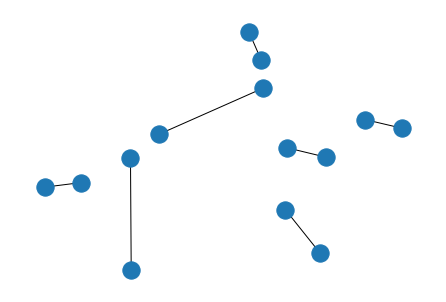

In [7]:
nx.draw(G.edge_subgraph(matching), pos=my_pos)

In [8]:
M = nx.MultiGraph()

M.add_nodes_from(range(n))

M.add_edges_from(T.edges())
M.add_edges_from(matching)

print(M.edges)
print('M has this many edges', M.number_of_edges())

[(0, 13, 0), (0, 2, 0), (1, 12, 0), (1, 13, 0), (2, 14, 0), (3, 7, 0), (3, 7, 1), (4, 18, 0), (4, 11, 0), (5, 9, 0), (5, 9, 1), (5, 13, 0), (5, 17, 0), (6, 14, 0), (6, 14, 1), (7, 10, 0), (7, 11, 0), (8, 10, 0), (8, 19, 0), (8, 19, 1), (8, 12, 0), (11, 15, 0), (11, 15, 1), (13, 16, 0), (14, 18, 0), (16, 17, 0)]
M has this many edges 26


[(0, 2), (2, 14), (14, 6), (6, 14), (14, 18), (18, 4), (4, 11), (11, 15), (15, 11), (11, 7), (7, 3), (3, 7), (7, 10), (10, 8), (8, 19), (19, 8), (8, 12), (12, 1), (1, 13), (13, 16), (16, 17), (17, 5), (5, 9), (9, 5), (5, 13), (13, 0)]


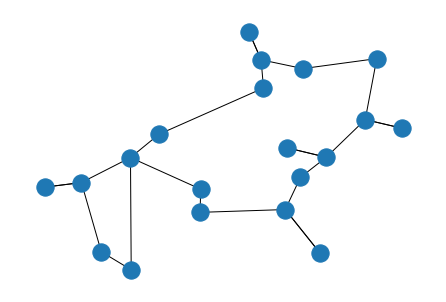

In [9]:
# find eulerian cylce of mutligraph

nx.draw(M,pos=my_pos)

initial_tour = list( nx.eulerian_circuit(M,source=0))
print(initial_tour)

In [10]:
# take shortcuts (avoid repeated nodes)

tour = [0]
for (i,j) in initial_tour:
    if j not in tour:
        tour.append(j)

print(tour)

[0, 2, 14, 6, 18, 4, 11, 15, 7, 3, 10, 8, 19, 12, 1, 13, 16, 17, 5, 9]


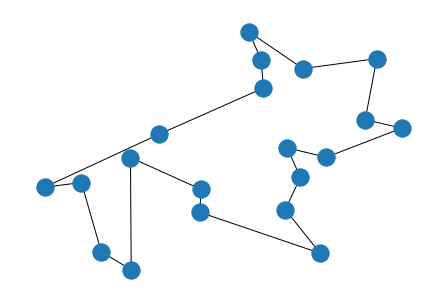

In [11]:
# draw tour
tour_edges = [ (tour[i-1], tour[i]) for i in range(n) ]
nx.draw( G.edge_subgraph(tour_edges), pos=my_pos)